In [26]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv('/content/Crop_recommendation.csv')

In [28]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [29]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [31]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [32]:
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [33]:
df.size

17600

In [34]:
df.shape

(2200, 8)

In [35]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [36]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [37]:
df.dtypes

,0
N,int64
P,int64
K,int64
temperature,float64
humidity,float64
ph,float64
rainfall,float64
label,object


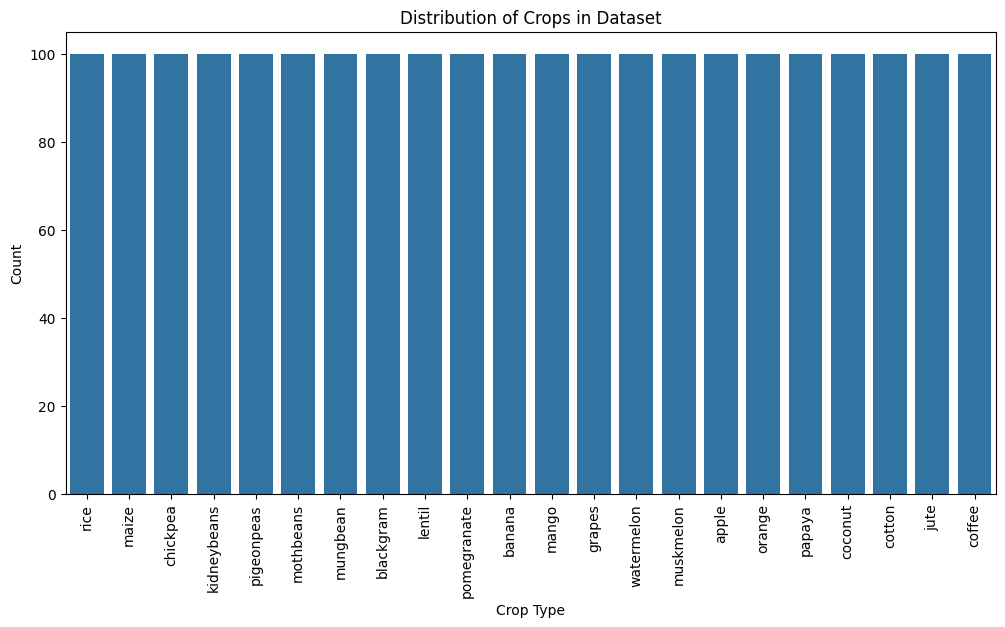

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='label', order=df['label'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution of Crops in Dataset")
plt.xlabel("Crop Type")
plt.ylabel("Count")
plt.show()


In [39]:
df['label'].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


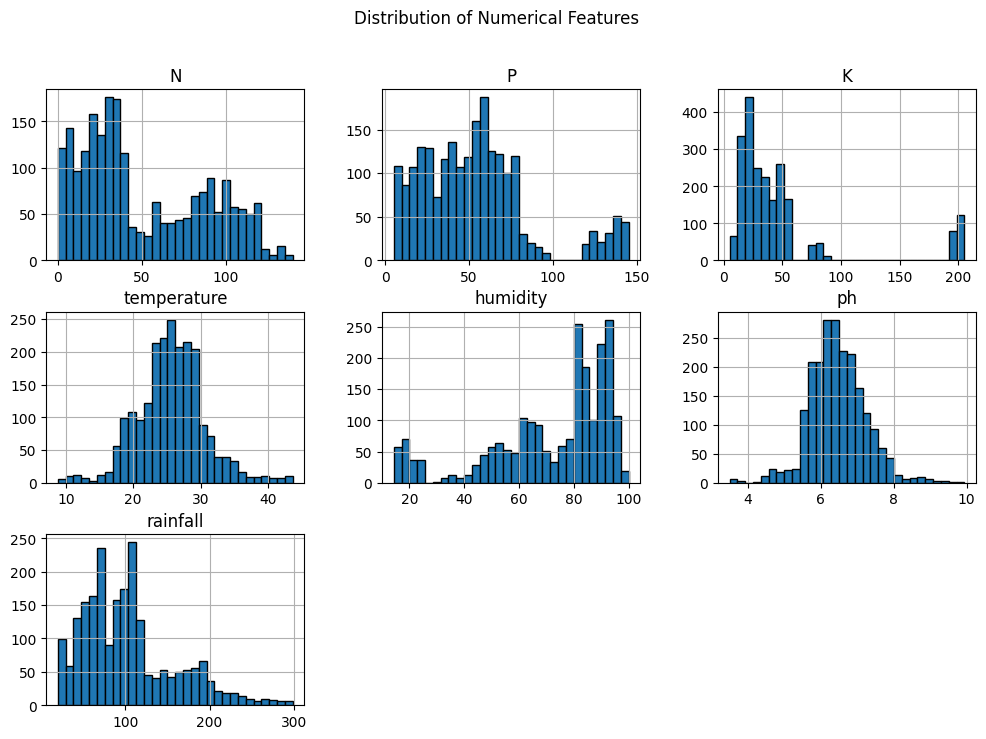

In [40]:
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()

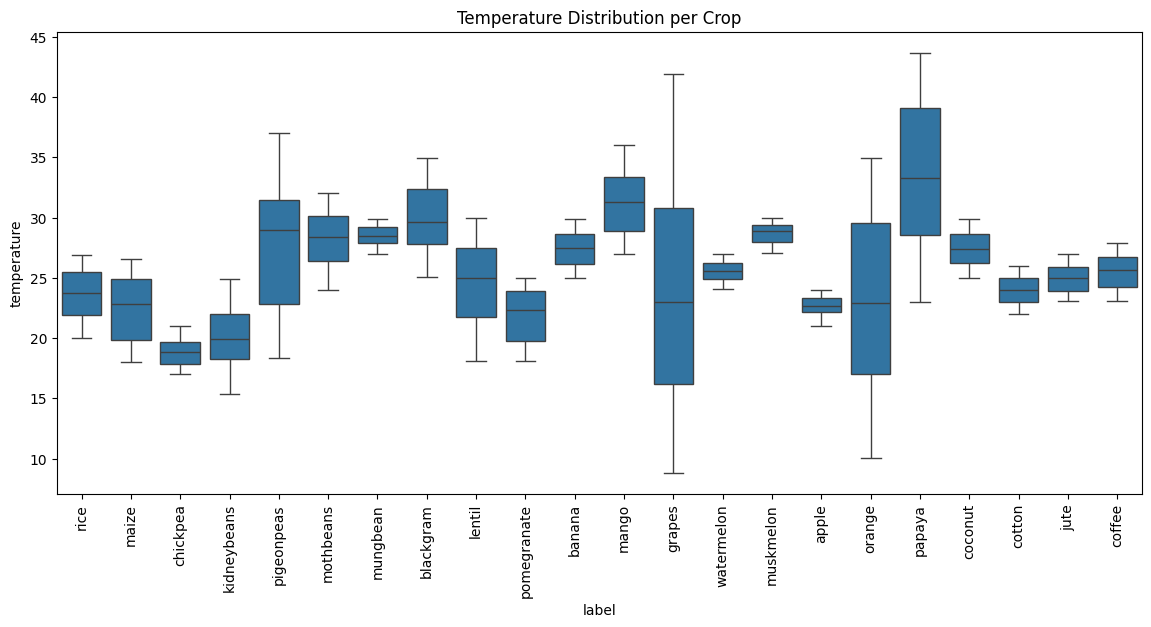

In [41]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='label', y='temperature', data=df)
plt.xticks(rotation=90)
plt.title("Temperature Distribution per Crop")
plt.show()

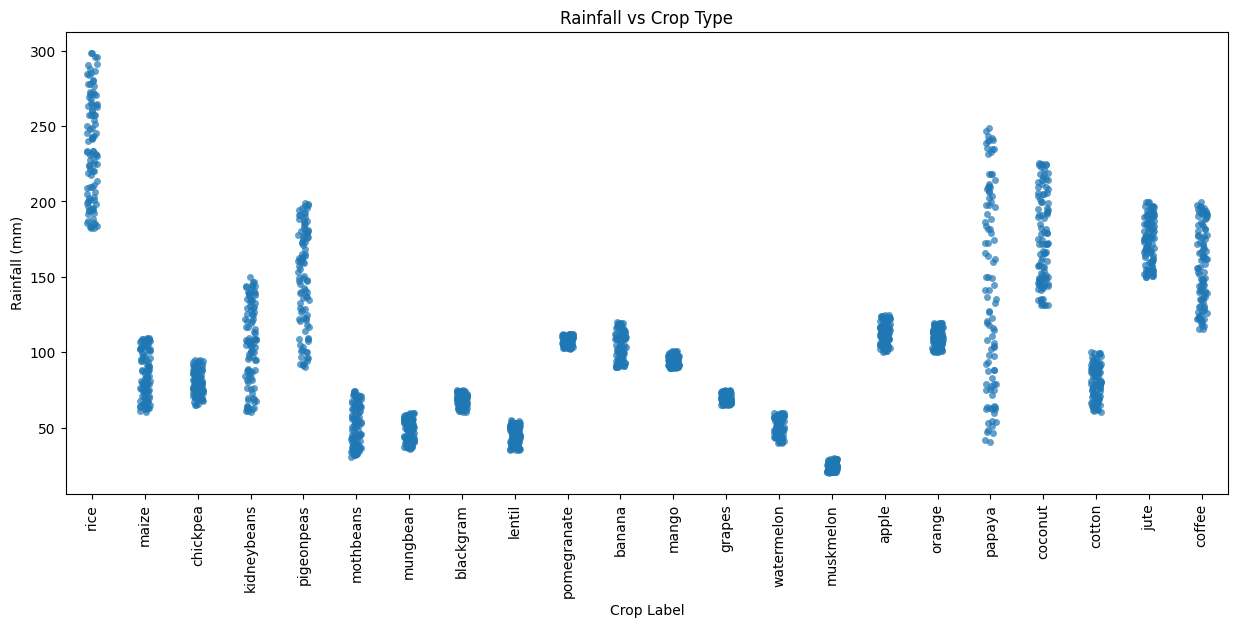

In [42]:
plt.figure(figsize=(15, 6))
sns.stripplot(x=df["label"], y=df["rainfall"], jitter=True, alpha=0.7)
plt.xticks(rotation=90)
plt.xlabel("Crop Label")
plt.ylabel("Rainfall (mm)")
plt.title("Rainfall vs Crop Type")
plt.show()

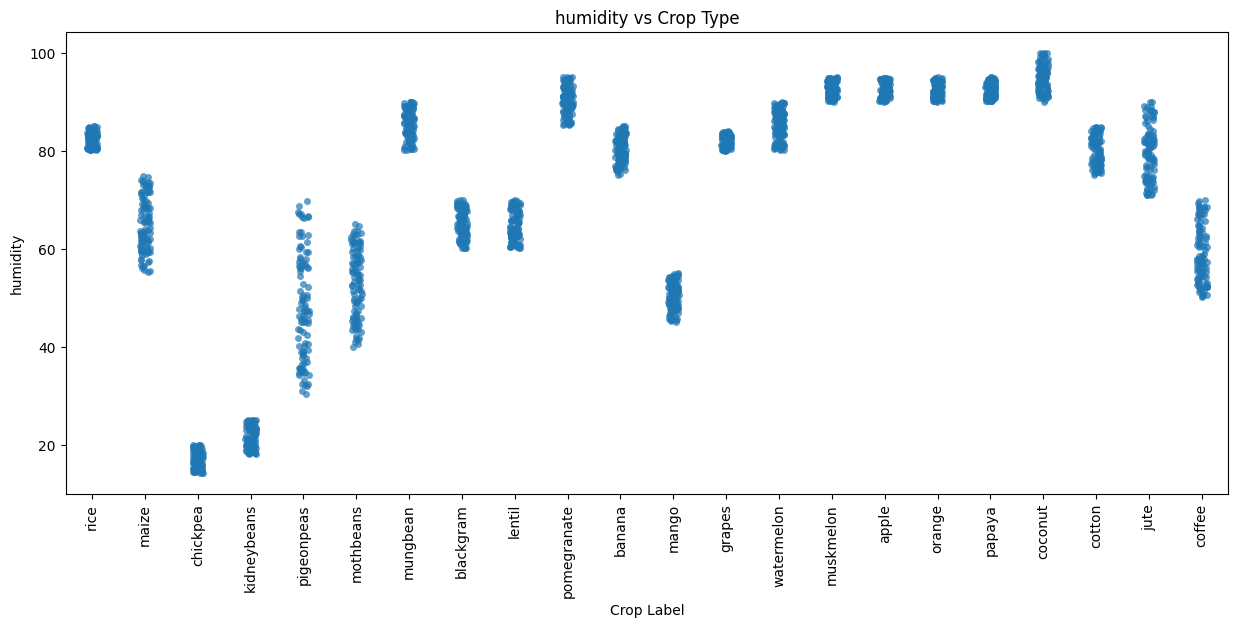

In [43]:
plt.figure(figsize=(15, 6))
sns.stripplot(x=df["label"], y=df["humidity"], jitter=True, alpha=0.7)
plt.xticks(rotation=90)
plt.xlabel("Crop Label")
plt.ylabel("humidity")
plt.title("humidity vs Crop Type")
plt.show()

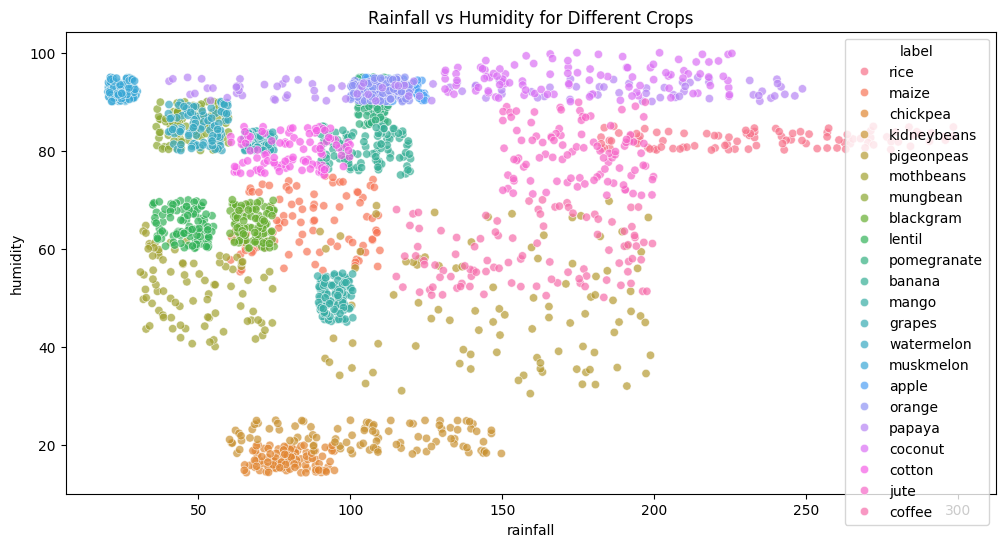

In [44]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='rainfall', y='humidity', hue='label', alpha=0.7)
plt.title("Rainfall vs Humidity for Different Crops")
plt.show()

<Axes: >

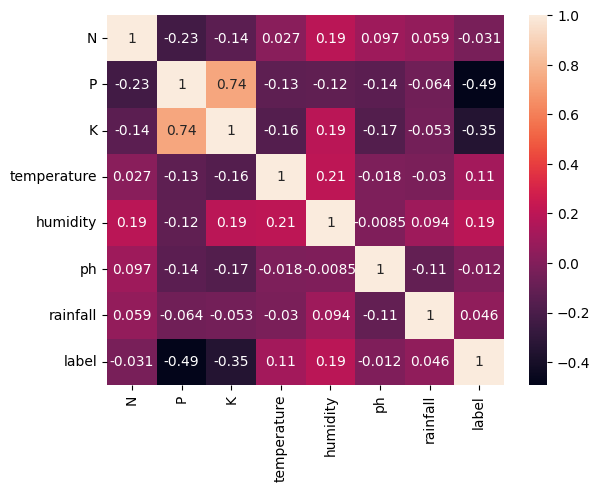

In [45]:

label_encoder = LabelEncoder()
x = df.copy()
x['label'] = label_encoder.fit_transform(x['label'])
sns.heatmap(x.corr(),annot=True)

### Seperating features and target label

In [46]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']

labels = df['label']

In [47]:

Xtrain, Xval, Ytrain, Yval = train_test_split(features,target,test_size = 0.3,random_state =42, shuffle = True)

Xval, Xtest, Yval, Ytest = train_test_split(Xval,Yval,test_size = 0.1, shuffle = False)


In [48]:
print(f"Size of training: {Xtrain.shape}")

print(f"Size of validation: {Xval.shape}")

print(f"Size of testing: {Xtest.shape}")

Size of training: (1540, 7)
Size of validation: (594, 7)
Size of testing: (66, 7)


# Random Forest

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


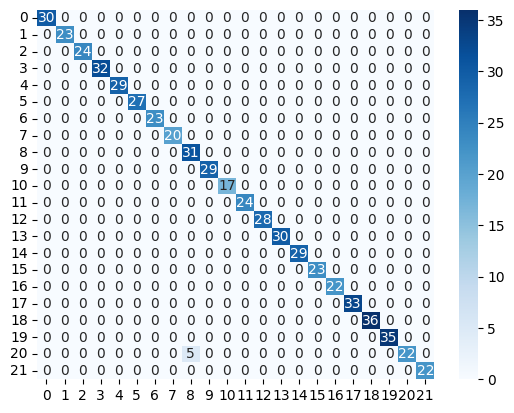

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

random_forest = RandomForestClassifier(random_state=2, n_jobs=-1)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
}


grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(Xtrain, Ytrain)


best_params = grid_search.best_params_



best_random_forest = RandomForestClassifier(**best_params, random_state=2, n_jobs=-1)
best_random_forest.fit(Xtrain, Ytrain)
predicted_values_tarin = best_random_forest.predict(Xtrain)
predicted_values_val = best_random_forest.predict(Xval)
predicted_values_test = best_random_forest.predict(Xtest)
x_train = metrics.accuracy_score(Ytrain, predicted_values_tarin)
x_val = metrics.accuracy_score(Yval, predicted_values_val)
x_test = metrics.accuracy_score(Ytest, predicted_values_test)


🎯 Best accuracy_train: 99.93506493506493
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        66
      banana       1.00      1.00      1.00        74
   blackgram       1.00      1.00      1.00        74
    chickpea       1.00      1.00      1.00        66
     coconut       1.00      1.00      1.00        67
      coffee       1.00      1.00      1.00        70
      cotton       1.00      1.00      1.00        72
      grapes       1.00      1.00      1.00        77
        jute       0.99      1.00      0.99        66
 kidneybeans       1.00      1.00      1.00        64
      lentil       1.00      1.00      1.00        78
       maize       1.00      1.00      1.00        74
       mango       1.00      1.00      1.00        68
   mothbeans       1.00      1.00      1.00        66
    mungbean       1.00      1.00      1.00        70
   muskmelon       1.00      1.00      1.00        76
      orange       1.00      1.00      1

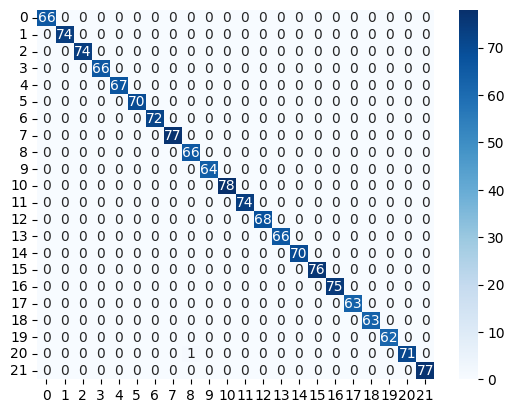

🎯 Best accuracy_val: 99.15824915824916
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        30
      banana       1.00      1.00      1.00        23
   blackgram       1.00      1.00      1.00        24
    chickpea       1.00      1.00      1.00        32
     coconut       1.00      1.00      1.00        29
      coffee       1.00      1.00      1.00        27
      cotton       1.00      1.00      1.00        23
      grapes       1.00      1.00      1.00        20
        jute       0.86      1.00      0.93        31
 kidneybeans       1.00      1.00      1.00        29
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        24
       mango       1.00      1.00      1.00        28
   mothbeans       1.00      1.00      1.00        30
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

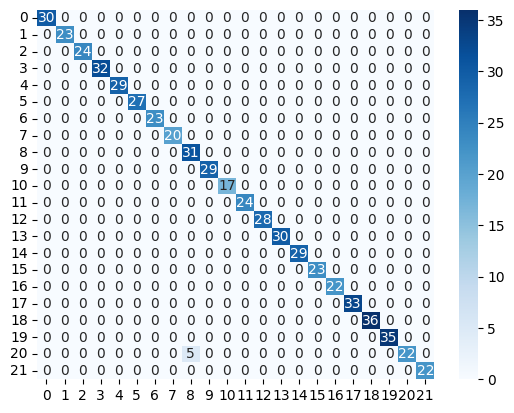

🎯 Best accuracy_test: 100.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         4
      banana       1.00      1.00      1.00         3
   blackgram       1.00      1.00      1.00         2
    chickpea       1.00      1.00      1.00         2
     coconut       1.00      1.00      1.00         4
      coffee       1.00      1.00      1.00         3
      cotton       1.00      1.00      1.00         5
      grapes       1.00      1.00      1.00         3
        jute       1.00      1.00      1.00         3
 kidneybeans       1.00      1.00      1.00         7
      lentil       1.00      1.00      1.00         5
       maize       1.00      1.00      1.00         2
       mango       1.00      1.00      1.00         4
   mothbeans       1.00      1.00      1.00         4
    mungbean       1.00      1.00      1.00         1
   muskmelon       1.00      1.00      1.00         1
      orange       1.00      1.00      1.00         3

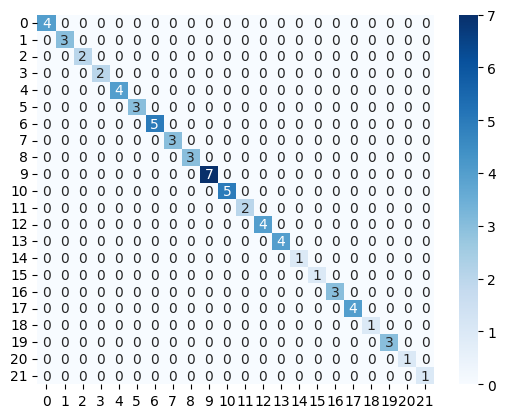

In [50]:
print("🎯 Best accuracy_train:", x_train * 100)
print(classification_report(Ytrain, predicted_values_tarin))
cm = confusion_matrix(Ytrain, predicted_values_tarin)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.show()
print("🎯 Best accuracy_val:", x_val * 100)
print(classification_report(Yval, predicted_values_val))

cm = confusion_matrix(Yval, predicted_values_val)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.show()
print("🎯 Best accuracy_test:", x_test * 100)
print(classification_report(Ytest, predicted_values_test))
cm = confusion_matrix(Ytest, predicted_values_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.show()

### Saving trained Random Forest model

In [51]:
import os
import joblib

DT_joblib_filename = 'Random_forest.joblib'
joblib.dump(best_random_forest, DT_joblib_filename)

print("✅ Model saved", DT_joblib_filename)

✅ Model saved Random_forest.joblib


## Making a prediction

In [52]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = best_random_forest.predict(data)
print(prediction)

['coffee']


In [53]:
data = np.array([[90, 40, 40, 20, 80, 6, 200]])
prediction = best_random_forest.predict(data)
print(prediction)

['rice']


In [54]:
data = np.array([[3, 26, 40, 24, 90, 6, 112]])
prediction = best_random_forest.predict(data)
print(prediction)

['pomegranate']


In [55]:
data = np.array([[1, 50, 40, 42, 100, 6, 150]])
prediction = best_random_forest.predict(data)
print(prediction)

['papaya']
